# ✈️ Flight Price Analysis – Exploratory Data Analysis (EDA)

This notebook performs Exploratory Data Analysis (EDA) on flight price data to understand how various factors such as airline, journey date, stops, duration, source, and destination affect ticket prices.


### 1. Importing Required Libraries

In [305]:
import pandas as pd
import numpy as np

### 2. Loading the Dataset


In [306]:
df=pd.read_excel('flight_price.xlsx')
df.head(2)

,Airline,Date_of_Journey,Date_of_journey2,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


### 3. Understanding Dataset Structure


In [307]:
df.shape

(10683, 12)

In [308]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10683 non-null  object
 1   Date_of_Journey   10683 non-null  object
 2   Date_of_journey2  10683 non-null  object
 3   Source            10683 non-null  object
 4   Destination       10683 non-null  object
 5   Route             10682 non-null  object
 6   Dep_Time          10683 non-null  object
 7   Arrival_Time      10683 non-null  object
 8   Duration          10683 non-null  object
 9   Total_Stops       10682 non-null  object
 10  Additional_Info   10683 non-null  object
 11  Price             10683 non-null  int64 
dtypes: int64(1), object(11)
memory usage: 1001.7+ KB


In [309]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [310]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Date_of_journey2', 'Source',
       'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price'],
      dtype='object')

In [311]:
for col in df.columns:
    print()
    print(f"{col} - {df[col].unique()}")
    print("-"*80)


Airline - ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
--------------------------------------------------------------------------------

Date_of_Journey - ['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
--------------------------------------------------------------------------------

Date_of_journey2 - ['2019-03-24' '2019-05-01' '2

### 4. Handling Missing Values


In [312]:
df.isnull().sum()

Airline             0
Date_of_Journey     0
Date_of_journey2    0
Source              0
Destination         0
Route               1
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         1
Additional_Info     0
Price               0
dtype: int64

In [313]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Date_of_journey2,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,2019-05-06,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [314]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])
df['Route']=df['Route'].fillna(df['Route'].mode()[0])



In [315]:
df.isnull().sum()

Airline             0
Date_of_Journey     0
Date_of_journey2    0
Source              0
Destination         0
Route               0
Dep_Time            0
Arrival_Time        0
Duration            0
Total_Stops         0
Additional_Info     0
Price               0
dtype: int64

In [316]:
df.duplicated().sum()

np.int64(220)

In [317]:
df.drop_duplicates(inplace=True)

In [318]:
df.duplicated().sum()

np.int64(0)

In [319]:
df.head(2)

,Airline,Date_of_Journey,Date_of_journey2,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


In [320]:
df.drop('Date_of_journey2',axis=1,inplace=True)

### 5. Feature Engineering (Date & Time Processing)


In [321]:
df['Date_of_Journey'].str.split("/").str[0] #will give date

0        24
1         1
2         9
3        12
4        01
         ..
10678     9
10679    27
10680    27
10681    01
10682     9
Name: Date_of_Journey, Length: 10463, dtype: object

In [322]:
df['date']=df['Date_of_Journey'].str.split("/").str[0]
df['month']=df['Date_of_Journey'].str.split("/").str[1]
df['year']=df['Date_of_Journey'].str.split("/").str[2]

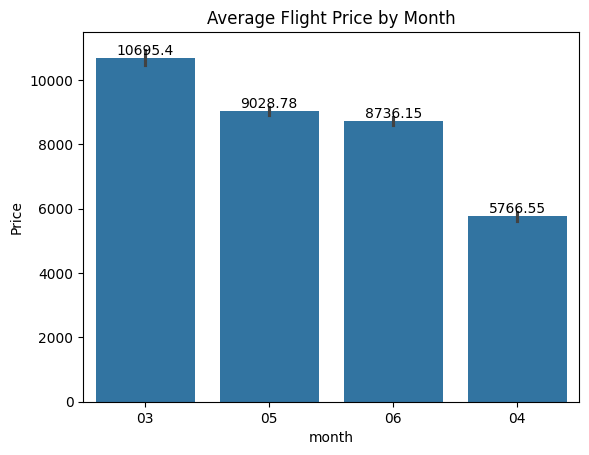

In [323]:
ax=sns.barplot(x='month', y='Price', data=df)
for bar in ax.containers:
    ax.bar_label(bar)

plt.title('Average Flight Price by Month')

plt.show()


In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10463 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10463 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
 11  date             10463 non-null  object
 12  month            10463 non-null  object
 13  year             10463 non-null  object
dtypes: int64(1), object(13)
memory usage: 1.2+ MB


In [325]:
# as our date month and year column is object we need to convert it into int

df['date']=df['date'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)

In [326]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10463 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10463 non-null  object
 1   Date_of_Journey  10463 non-null  object
 2   Source           10463 non-null  object
 3   Destination      10463 non-null  object
 4   Route            10463 non-null  object
 5   Dep_Time         10463 non-null  object
 6   Arrival_Time     10463 non-null  object
 7   Duration         10463 non-null  object
 8   Total_Stops      10463 non-null  object
 9   Additional_Info  10463 non-null  object
 10  Price            10463 non-null  int64 
 11  date             10463 non-null  int64 
 12  month            10463 non-null  int64 
 13  year             10463 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 1.2+ MB


In [327]:
# drop Date_of_Journey
df.drop('Date_of_Journey',axis=1,inplace=True)

In [328]:
df['Arrival_Time'].str.split(":").str[0]

0        01
1        13
2        04
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Time, Length: 10463, dtype: object

In [329]:
df['arrival_hour']=df['Arrival_Time'].str.split(":").str[0]
df['arrival_minutes']=df['Arrival_Time'].str.split(":").str[1]

In [330]:
df['arrival_minutes']=df['arrival_minutes'].str.split(" ").str[0]

In [331]:
df['arrival_hour']=df['arrival_hour'].astype(int)
df['arrival_minutes']=df['arrival_minutes'].astype(int)

In [332]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [333]:
df['dep_hour']=df['Dep_Time'].str.split(":").str[0]
df['dep_minutes']=df['Dep_Time'].str.split(":").str[1]

In [334]:
df['dep_hour']=df['dep_hour'].astype(int)
df['dep_minutes']=df['dep_minutes'].astype(int)

In [335]:
df.drop('Dep_Time',axis=1,inplace=True)

### 6. Cleaning and Transforming Categorical Features


In [336]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

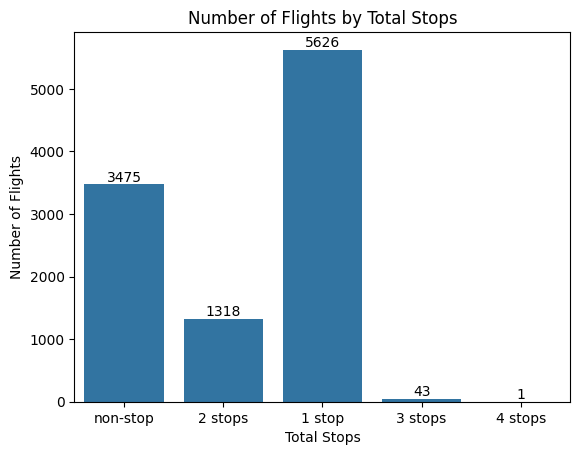

In [337]:
ax=sns.countplot(x='Total_Stops',data=df)

for bar in ax.containers:
    ax.bar_label(bar)

plt.title('Number of Flights by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Number of Flights')
plt.show()

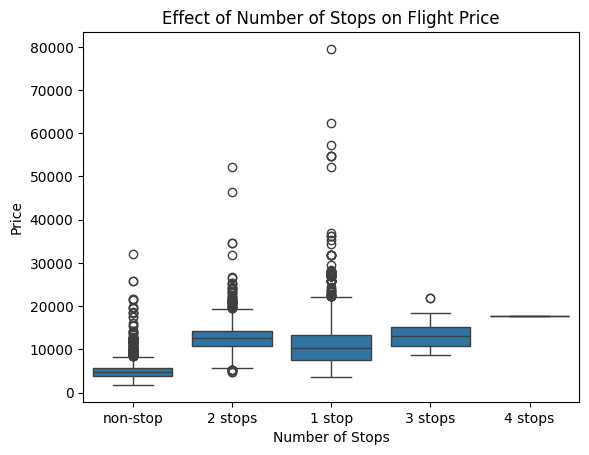

In [338]:
import matplotlib.pyplot as plt

sns.boxplot(x='Total_Stops',y='Price',data=df)
plt.title('Effect of Number of Stops on Flight Price')
plt.xlabel('Number of Stops')
plt.ylabel('Price')
plt.show()

In [339]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1,'3 stops':3,'4 stops':4})

In [340]:
df.drop('Route',axis=1,inplace=True)

In [341]:
df['duration_hour']=df['Duration'].str.split(" ").str[0].str.split("h").str[0]
df['duration_minutes']=df['Duration'].str.split(" ").str[1].str.split("m").str[0]

In [342]:
df['duration_hour'].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '5m', '41', '40'], dtype=object)

In [343]:
df['duration_hour']=df['duration_hour'].map({'5m':5})

In [344]:
df['duration_minutes'] = pd.to_numeric(
    df['duration_minutes'], 
    errors='coerce'
)


In [345]:
df['duration_minutes']=df['duration_minutes'].fillna(df['duration_minutes'].median())
df['duration_hour']=df['duration_hour'].fillna(df['duration_hour'].median())

In [346]:
df['duration_hour']=df['duration_hour'].astype(int)
df['duration_minutes']=df['duration_minutes'].astype(int)

In [347]:
df.drop('Duration',axis=1,inplace=True)

In [348]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [349]:
df.groupby('Source')['Price'].sum().reset_index().sort_values(by='Price',ascending=False)

,Source,Price
2,Delhi,45463135
3,Kolkata,26149219
0,Banglore,17481840
4,Mumbai,3526617
1,Chennai,1824949


Text(0.5, 1.0, 'Total Flight Price by Source City')

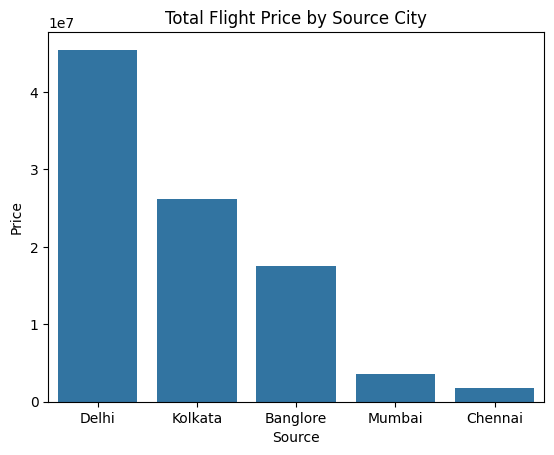

In [350]:
gb1=df.groupby('Source')['Price'].sum().reset_index().sort_values(by='Price',ascending=False)
sns.barplot(x='Source',y='Price',data=gb1)
plt.title("Total Flight Price by Source City")


Text(0.5, 1.0, 'Distribution of Flight Prices')

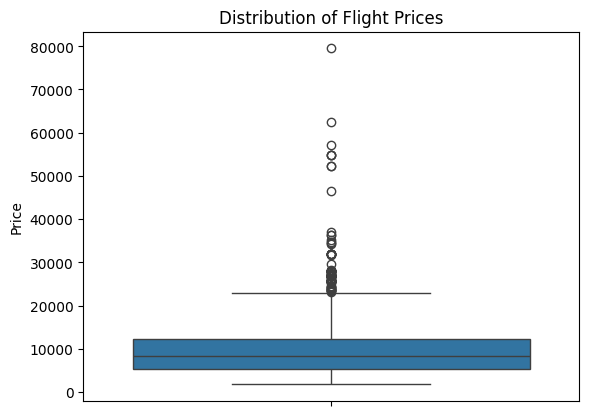

In [351]:
sns.boxplot(df['Price'])
plt.title("Distribution of Flight Prices")


In [352]:
categorical_cols = ['Airline', 'Source', 'Destination', 'Additional_Info']

df_encoded=pd.get_dummies(df,columns=categorical_cols,drop_first=True)

In [353]:
df_encoded.columns

Index(['Total_Stops', 'Price', 'date', 'month', 'year', 'arrival_hour',
       'arrival_minutes', 'dep_hour', 'dep_minutes', 'duration_hour',
       'duration_minutes', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi',
       'Additional_Info_1 Short layover', 'Additional_Info_2 Long layover',
       'Additional_Info_Business class', 'Additional_Info_Change airports',
       'Additional_Info_In-flight meal not included',
       'Additional_Info_No Info',
       'Additional_Info_No check-in baggage included',
       'Additional_Info_N